In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
df=pd.read_csv('../input/iris.data.txt',header=None,names=names)
df.head(7)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa


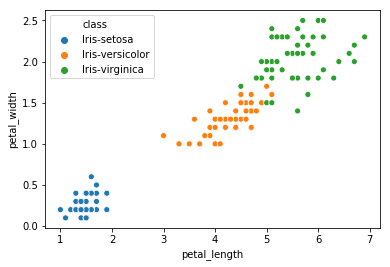

In [32]:
sns.scatterplot(x=df['petal_length'],y=df['petal_width'],hue=df['class'])

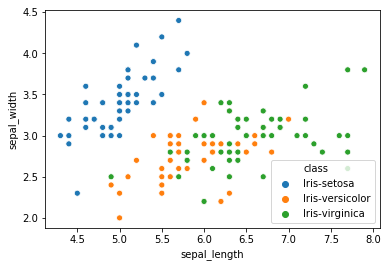

In [33]:
sns.scatterplot(x=df['sepal_length'],y=df['sepal_width'],hue=df['class'])

In [34]:
from sklearn.model_selection import train_test_split
X = np.array(df.iloc[:, 0:4])
y = np.array(df['class'])
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

Defining clssifiers.Fit the model for KNN using any K value

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
print(accuracy_score(y_test,pred))

0.98


A 10 Fold cross validation using a list of odd K's ranging from 1 to 50

In [36]:

from sklearn.model_selection import cross_val_score
mylist=list(range(1,50))
neighbor=list(filter(lambda x:x%2 !=0,mylist))
cvscore=[]
for k in neighbor:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,x_train,y_train,cv=10,scoring='accuracy')
    cvscore.append(scores.mean())

To find the misclassification error

In [37]:
MSE=[1-x for x in cvscore]

To get the minimum MSE for optimal K

In [38]:
optimal_k=neighbor[MSE.index(min(MSE))]
print("the optimal number of neighbors is",optimal_k)

the optimal number of neighbors is 7


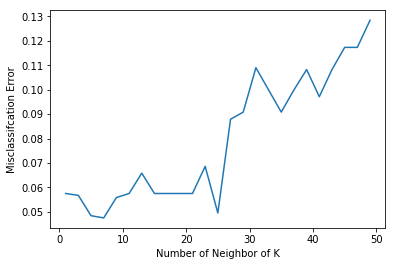

In [39]:
plt.plot(neighbor,MSE)
plt.xlabel('Number of Neighbor of K')
plt.ylabel('Misclassifcation Error')
plt.show()

Hereby We can se that K=7 gives us the lowest validation error

# Writting Own KNN function

In [40]:
def train(x_train,y_train):
    return

In [41]:
from collections import Counter
def predict(x_train,y_train,x_test,k):
    distance=[]
    target=[]
    for i in range(len(x_train)):
        dist=np.sqrt(np.sum(np.square(x_test - x_train[i,:])))
        distance.append([dist,i])
    distance=sorted(distance)
    for i in range(k):
        index=distance[i][1]
        target.append(y_train[index])
    return Counter(target).most_common(1)[0][0]

In [42]:
def KNearestNeighbor(x_train,y_train,x_test,prediction,k):
    if(k>len(x_train)):
        raise ValueError
        
    train(x_train,y_train)
    
   #For all observation
    for i in range(len(x_test)):
        prediction.append(predict(x_train,y_train,x_test[i,:],k))

In [43]:
predictions=[]
try:
    KNearestNeighbor(x_train,y_train,x_test,predictions,7)
    #List to array
    predictions=np.asarray(predictions)
    #Accuracy
    accuracy=accuracy_score(y_test,predictions)
    print('The accuracy of the classifier is',accuracy*100 , '%')
except ValueError:
    print("Can't have more neighbor than training samples!!")

The accuracy of the classifier is 98.0 %
